In [268]:
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly as plt
import matplotlib.pyplot as mp
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector

In [269]:
#bringing the files in to the main document to allow analysis
df_games = pd.read_csv(r'data/games.csv')
df_scouting = pd.read_csv(r'data/pffScoutingData.csv')
df_players = pd.read_csv(r'data/players.csv') 
df_plays = pd.read_csv(r'data/plays.csv')
df_week1 = pd.read_csv(r'data/week1.csv')
df_week2 = pd.read_csv(r'data/week2.csv')
df_week3 = pd.read_csv(r'data/week3.csv')
df_week4 = pd.read_csv(r'data/week4.csv')
df_week5 = pd.read_csv(r'data/week5.csv')
df_week6 = pd.read_csv(r'data/week6.csv')
df_week7 = pd.read_csv(r'data/week7.csv')
df_week8 = pd.read_csv(r'data/week8.csv')


In [270]:
#A look at all of the columns in the dataset for plays
columns = df_plays.columns

In [271]:
#filtering the columns for useful values

cols= ['quarter','down','yardsToGo','yardlineNumber','preSnapHomeScore','preSnapVisitorScore','passResult'
           ,'absoluteYardlineNumber','offenseFormation','personnelO','personnelD','pff_passCoverage', 
         'pff_passCoverageType','defendersInBox','prePenaltyPlayResult']



num_cols = ['quarter','down','yardsToGo','yardlineNumber','preSnapHomeScore','preSnapVisitorScore','penaltyYards',
        'playResult','absoluteYardlineNumber', 'defendersInTheBox']

cat_cols = ['passResult','offenseFormation', 'personnelO','personnelD','pff_passCoverage', 'pff_passCoverageType']



      quarter  down  yardsToGo  yardlineNumber  preSnapHomeScore  \
0           1     3          2              33                 0   
1           1     1         10               2                 0   
2           1     2          6              34                 0   
3           1     1         10              39                 0   
4           1     3         15              44                 0   
...       ...   ...        ...             ...               ...   
8552        4     3          8               8                17   
8553        4     1         10              25                20   
8554        4     2          7              28                20   
8555        4     3         15              20                20   
8556        4     4         15              20                20   

      preSnapVisitorScore passResult  penaltyYards  playResult  \
0                       0          I           NaN           0   
1                       0          C           NaN 

In [272]:
#Determining which columns have substantial data missing 
for col in cols:
    print(df_plays[col].isna().value_counts()/len(df_plays))
    
#Lots of missing data from passResult > 90% so we will remove that column from our dataset


False    1.0
Name: quarter, dtype: float64
False    1.0
Name: down, dtype: float64
False    1.0
Name: yardsToGo, dtype: float64
False    1.0
Name: yardlineNumber, dtype: float64
False    1.0
Name: preSnapHomeScore, dtype: float64
False    1.0
Name: preSnapVisitorScore, dtype: float64
False    1.0
Name: passResult, dtype: float64
False    0.999883
True     0.000117
Name: absoluteYardlineNumber, dtype: float64
False    0.999182
True     0.000818
Name: offenseFormation, dtype: float64
False    0.999883
True     0.000117
Name: personnelO, dtype: float64
False    0.999883
True     0.000117
Name: personnelD, dtype: float64
False    1.0
Name: pff_passCoverage, dtype: float64
False    1.0
Name: pff_passCoverageType, dtype: float64
False    0.999182
True     0.000818
Name: defendersInBox, dtype: float64
False    1.0
Name: prePenaltyPlayResult, dtype: float64


In [273]:
cols.remove('passResult')
cat_cols.remove('passResult')

df = df_plays[cols]
print(df)

      quarter  down  yardsToGo  yardlineNumber  preSnapHomeScore  \
0           1     3          2              33                 0   
1           1     1         10               2                 0   
2           1     2          6              34                 0   
3           1     1         10              39                 0   
4           1     3         15              44                 0   
...       ...   ...        ...             ...               ...   
8552        4     3          8               8                17   
8553        4     1         10              25                20   
8554        4     2          7              28                20   
8555        4     3         15              20                20   
8556        4     4         15              20                20   

      preSnapVisitorScore  absoluteYardlineNumber offenseFormation  \
0                       0                    43.0          SHOTGUN   
1                       0                  

In [274]:
#removing the remaining rows with na < 10%
df = df.dropna()


In [275]:
#Testing code to ensure na rows are dropped
for col in cols:
    print(df[col].isna().value_counts())
    

False    8550
Name: quarter, dtype: int64
False    8550
Name: down, dtype: int64
False    8550
Name: yardsToGo, dtype: int64
False    8550
Name: yardlineNumber, dtype: int64
False    8550
Name: preSnapHomeScore, dtype: int64
False    8550
Name: preSnapVisitorScore, dtype: int64
False    8550
Name: absoluteYardlineNumber, dtype: int64
False    8550
Name: offenseFormation, dtype: int64
False    8550
Name: personnelO, dtype: int64
False    8550
Name: personnelD, dtype: int64
False    8550
Name: pff_passCoverage, dtype: int64
False    8550
Name: pff_passCoverageType, dtype: int64
False    8550
Name: defendersInBox, dtype: int64
False    8550
Name: prePenaltyPlayResult, dtype: int64


In [276]:
X =  pd.get_dummies(df.drop('prePenaltyPlayResult',axis=1),columns = cat_cols)


In [277]:
y = df['prePenaltyPlayResult']
print(y)

0        0
1       28
2        5
3        0
4        0
        ..
8552    -8
8553     3
8554    -8
8555     0
8556    -5
Name: prePenaltyPlayResult, Length: 8550, dtype: int64


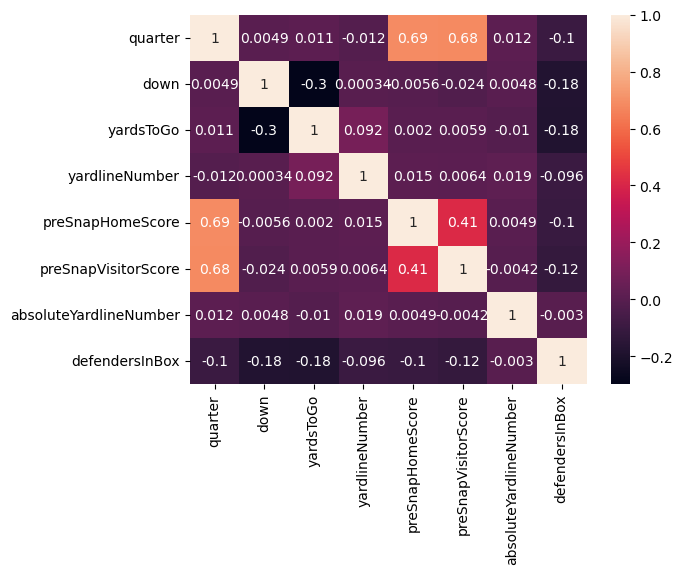

In [278]:
#creating visualizations

dataplot = sns.heatmap(df.drop('prePenaltyPlayResult',axis=1).corr(), annot=True)
  


In [279]:
# creating a train test split 
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size = 0.8,random_state = 42)

In [280]:
#creating the linear regression

reg = LinearRegression()
reg.fit(x_train,y_train)

print(reg.score(x_test,y_test))
coefficients = reg.coef_


0.007175233297390782


In [281]:
#lets use sequential feature selection 

reg_feature_selection1 = LinearRegression()

for i in range(1,5):
    l1 =  LinearRegression()
    sfs = SequentialFeatureSelector(estimator =reg_feature_selection1,n_features_to_select=i*3, direction='forward')
    sfs.fit(x_train,y_train)
    indexes = sfs.get_support(indices = True)
    list = []
    for index in indexes:
        list.append(X.columns[index])
    l1.fit(x_train[list],y_train)
    print(list)
    print(l1.score(x_test[list],y_test))
    

['down', 'yardlineNumber', 'pff_passCoverage_Red Zone']
0.015956040707718167
['down', 'yardlineNumber', 'personnelO_1 RB, 0 TE, 4 WR', 'pff_passCoverage_Bracket', 'pff_passCoverage_Goal Line', 'pff_passCoverage_Red Zone']
0.010862593434081691
['down', 'yardlineNumber', 'offenseFormation_SINGLEBACK', 'personnelO_1 RB, 0 TE, 4 WR', 'personnelO_1 RB, 2 TE, 2 WR', 'personnelD_1 DL, 3 LB, 7 DB', 'pff_passCoverage_Bracket', 'pff_passCoverage_Goal Line', 'pff_passCoverage_Red Zone']
0.010730802633046932
['down', 'yardlineNumber', 'offenseFormation_SINGLEBACK', 'personnelO_1 RB, 0 TE, 4 WR', 'personnelO_1 RB, 2 TE, 2 WR', 'personnelO_2 QB, 1 RB, 1 TE, 2 WR', 'personnelO_2 QB, 2 RB, 1 TE, 1 WR', 'personnelD_1 DL, 3 LB, 7 DB', 'personnelD_2 DL, 4 LB, 5 DB', 'pff_passCoverage_Bracket', 'pff_passCoverage_Goal Line', 'pff_passCoverage_Red Zone']
0.011434384066004721


In [282]:
"""
After fitting our data to the regression model and applying a sequential feature selection we find that in
general the score of our model is quite low. This is not surprising given that we want to pick the yardage 
gained in each play and each play is more akin to an independent event. However the sequential feature selection does
give us some insight into possible features to look more in to. 

"""


'\nAfter adding \n\n\n'